In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
Zt = pd.read_excel('/content/drive/MyDrive/Time Series Studies/ICV.xls')
Zt = Zt['ICV']

t = np.array([np.arange(1,len(Zt)+1)]).T

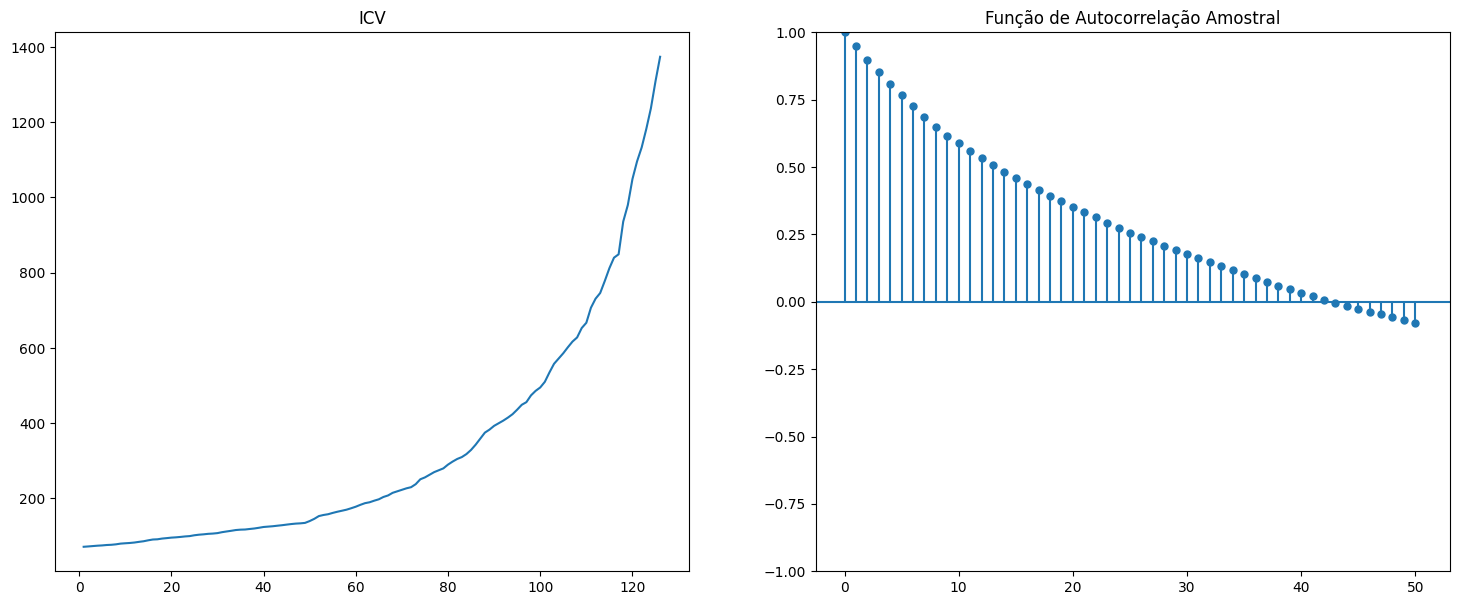

In [3]:
plt.figure(figsize = (18,7))

plt.subplot(1,2,1)
plt.plot(t, Zt)
plt.title('ICV')

ax2 = plt.subplot(1,2,2)
plot_acf(Zt, lags = 50, title = 'Função de Autocorrelação Amostral', alpha = 1, ax = ax2)

plt.show()

In [4]:
nSamples = len(Zt)

nTestSamples = round(nSamples * 0.1)
nModel = nSamples - nTestSamples

print(f'Número de Amostras: {nSamples}')
print(f'Número de Amostras Modelagem: {nModel}')
print(f'Número de Amostras Teste: {nTestSamples}')

Número de Amostras: 126
Número de Amostras Modelagem: 113
Número de Amostras Teste: 13


In [5]:
# Separação de dados para modelagem

tModel = t[0:nModel]
ZtModel = Zt[0:nModel]

# Separação de dados para teste

tTest = t[nModel:]
ZtTest = Zt[nModel:]

Text(0, 0.5, 'ICV')

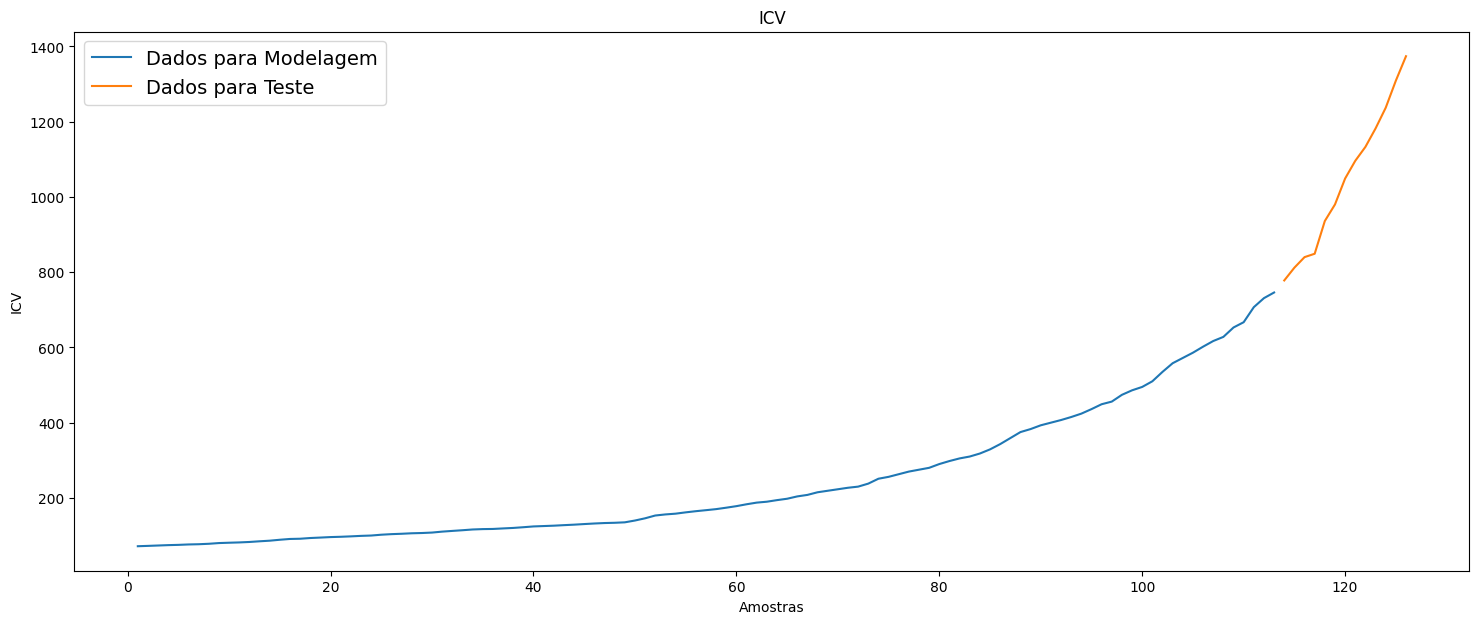

In [6]:
plt.figure(figsize = (18,7))

plt.plot(tModel,ZtModel, label = 'Dados para Modelagem')
plt.plot(tTest,ZtTest, label = 'Dados para Teste')
plt.legend(loc = 'upper left', prop = {'size':14})

plt.title('ICV')
plt.xlabel('Amostras')
plt.ylabel('ICV')

In [7]:
def MQtend(serie, pol_order, indice):

  N = len(serie)

  T = np.ones((N, pol_order +1))

  for i in range(pol_order + 1):
    T[:,i] = (indice.T)**i

  thetaMQ = np.dot(np.dot(np.linalg.inv(np.dot(T.T,T)),T.T),serie)

  return thetaMQ


def MQestimativa(parametros, indice):

  N = len(indice)

  pol_order = len(parametros) - 1

  T = np.ones((N, pol_order +1))

  for i in range(pol_order + 1):
    T[:,i] = (indice.T)**i

  Zest = np.dot(T,parametros)

  return Zest

In [8]:
theta1 = MQtend(ZtModel,1,tModel)
theta2 = MQtend(ZtModel,2,tModel)
theta3 = MQtend(ZtModel,3,tModel)

print()
print('Parametros Modelo 1:')
print(theta1)


print()
print('Parametros Modelo 2:')
print(theta2)


print()
print('Parametros Modelo 3:')
print(theta3)


Parametros Modelo 1:
[-39.85493047   4.94668641]

Parametros Modelo 2:
[ 1.21892490e+02 -3.49230944e+00  7.40262793e-02]

Parametros Modelo 3:
[ 5.97969798e+01  2.90359832e+00 -6.56187956e-02  8.16637865e-04]


In [9]:
ZtModel1 = MQestimativa(theta1,tModel)
ZtModel2 = MQestimativa(theta2,tModel)
ZtModel3 = MQestimativa(theta3,tModel)

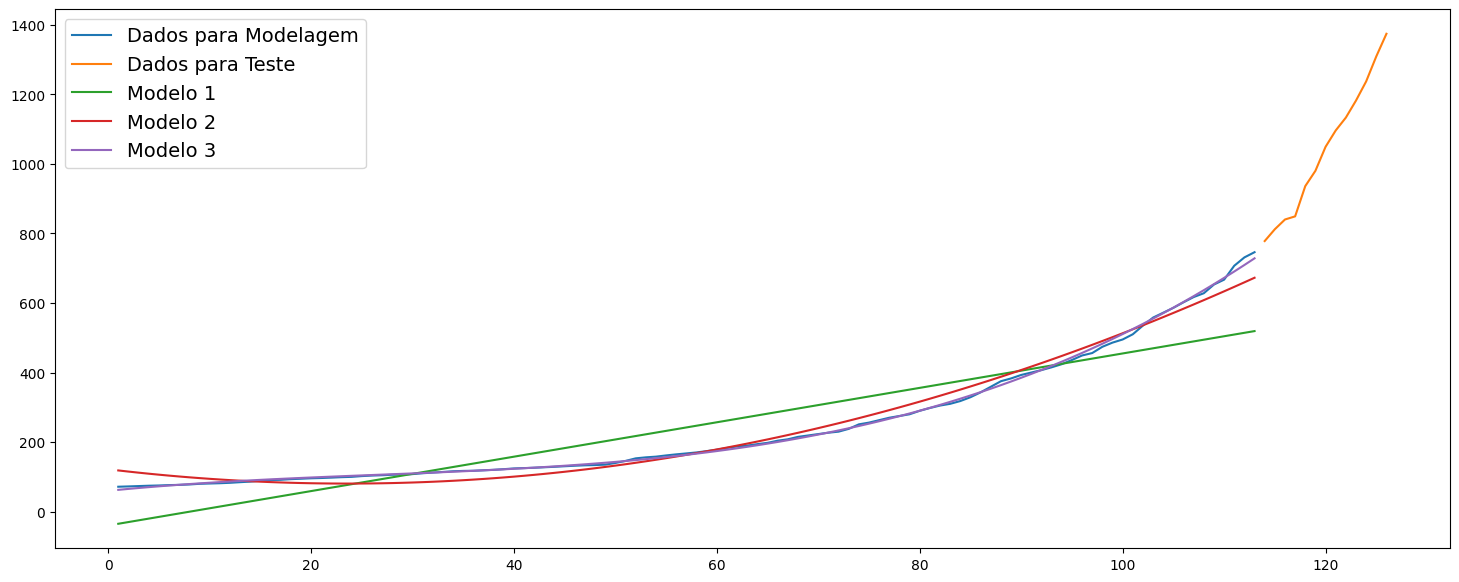

In [10]:
plt.figure(figsize = (18,7))

plt.plot(tModel,ZtModel, label = 'Dados para Modelagem')
plt.plot(tTest,ZtTest, label = 'Dados para Teste')
plt.plot(tModel,ZtModel1, label = 'Modelo 1')
plt.plot(tModel,ZtModel2, label = 'Modelo 2')
plt.plot(tModel,ZtModel3, label = 'Modelo 3')

plt.legend(loc = 'upper left', prop = {'size':14})
plt.show()

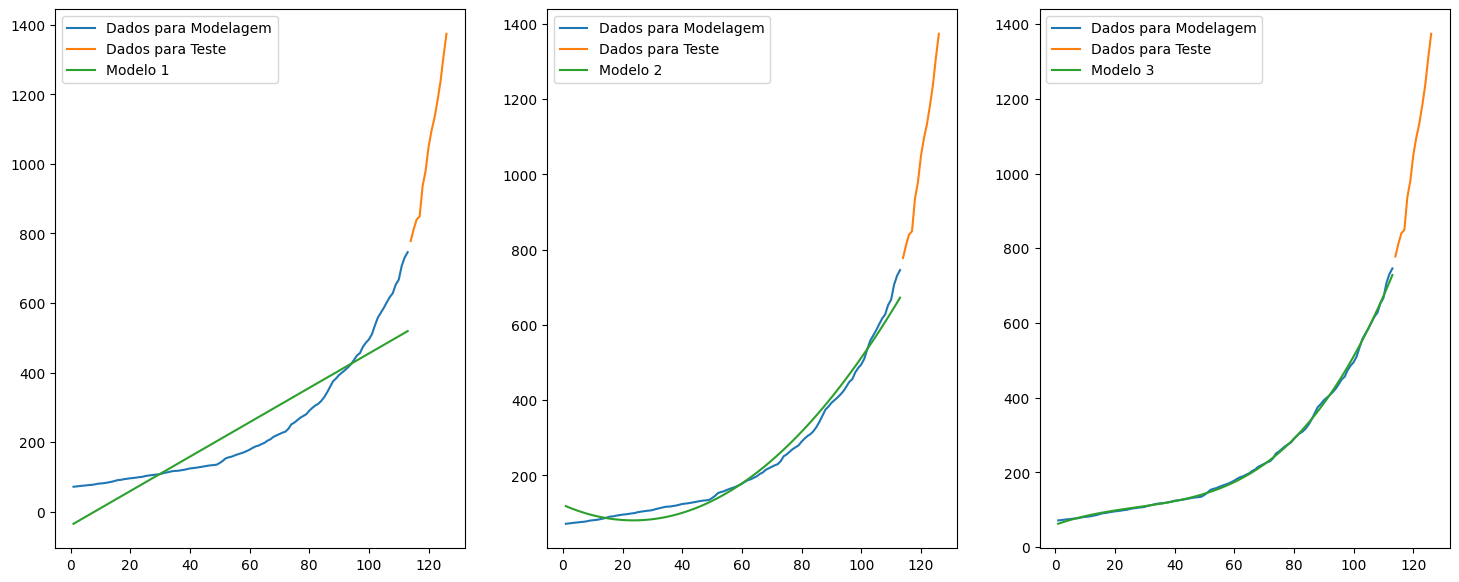

In [11]:
plt.figure(figsize = (18,7))

plt.subplot(1,3,1)
plt.plot(tModel,ZtModel, label = 'Dados para Modelagem')
plt.plot(tTest,ZtTest, label = 'Dados para Teste')
plt.plot(tModel,ZtModel1, label = 'Modelo 1')
plt.legend(loc = 'upper left', prop = {'size':10})

plt.subplot(1,3,2)
plt.plot(tModel,ZtModel, label = 'Dados para Modelagem')
plt.plot(tTest,ZtTest, label = 'Dados para Teste')
plt.plot(tModel,ZtModel2, label = 'Modelo 2')
plt.legend(loc = 'upper left', prop = {'size':10})

plt.subplot(1,3,3)
plt.plot(tModel,ZtModel, label = 'Dados para Modelagem')
plt.plot(tTest,ZtTest, label = 'Dados para Teste')
plt.plot(tModel,ZtModel3, label = 'Modelo 3')
plt.legend(loc = 'upper left', prop = {'size':10})

plt.show()

In [12]:
res1 = abs(ZtModel1 - ZtModel)
res2 = abs(ZtModel2 - ZtModel)
res3 = abs(ZtModel3 - ZtModel)

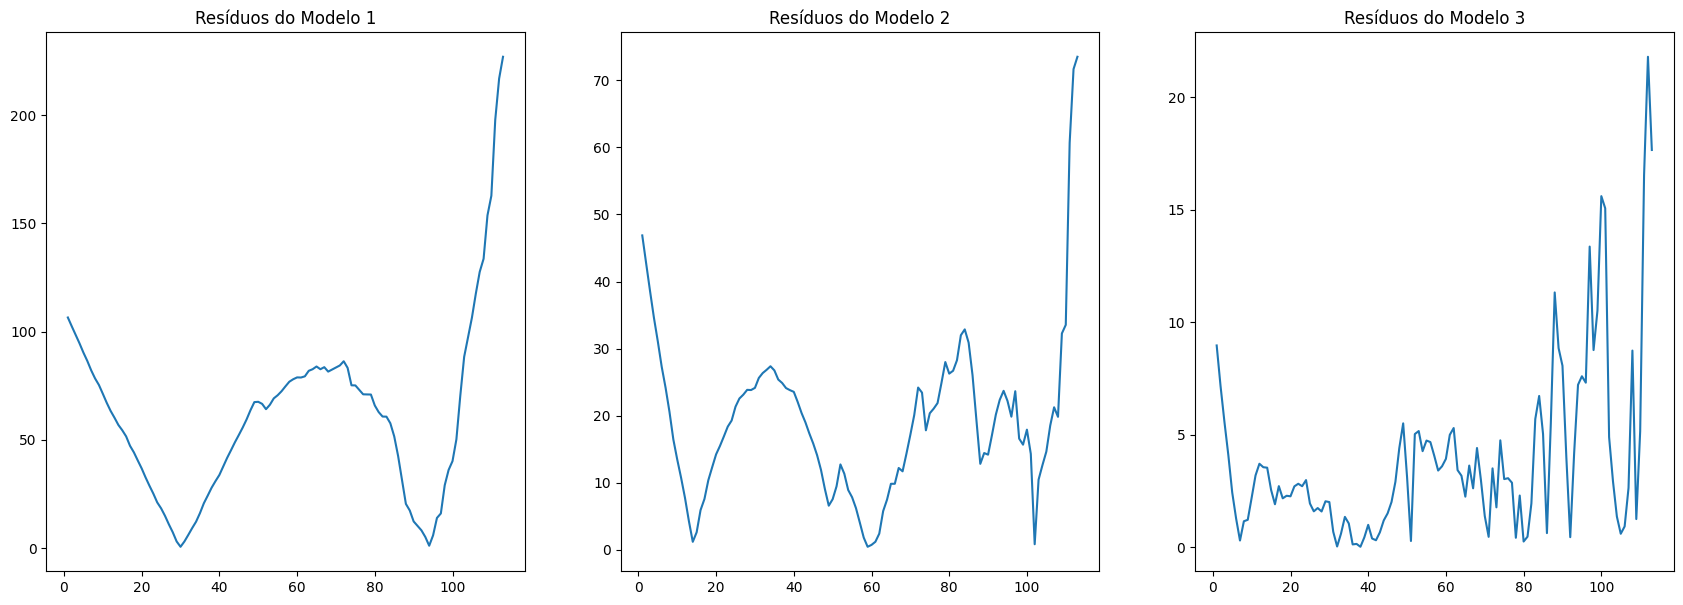

In [13]:
plt.figure(figsize = (21,7))

plt.subplot(1,3,1)
plt.plot(tModel,res1)
plt.title('Resíduos do Modelo 1')

plt.subplot(1,3,2)
plt.plot(tModel,res2)
plt.title('Resíduos do Modelo 2')

plt.subplot(1,3,3)
plt.plot(tModel,res3)
plt.title('Resíduos do Modelo 3')

plt.show()

In [14]:
res1med = np.mean(res1)
res2med = np.mean(res2)
res3med = np.mean(res3)

print(f'Média dos Resíduos do Modelo 1: {res1med}')

print(f'Média dos Resíduos do Modelo 2: {res2med}')

print(f'Média dos Resíduos do Modelo 3: {res3med}')

Média dos Resíduos do Modelo 1: 61.26859711342735
Média dos Resíduos do Modelo 2: 19.340183361082026
Média dos Resíduos do Modelo 3: 3.8895506753515323


In [15]:
ZtTest1 = MQestimativa(theta1, tTest)
ZtTest2 = MQestimativa(theta2, tTest)
ZtTest3 = MQestimativa(theta3, tTest)

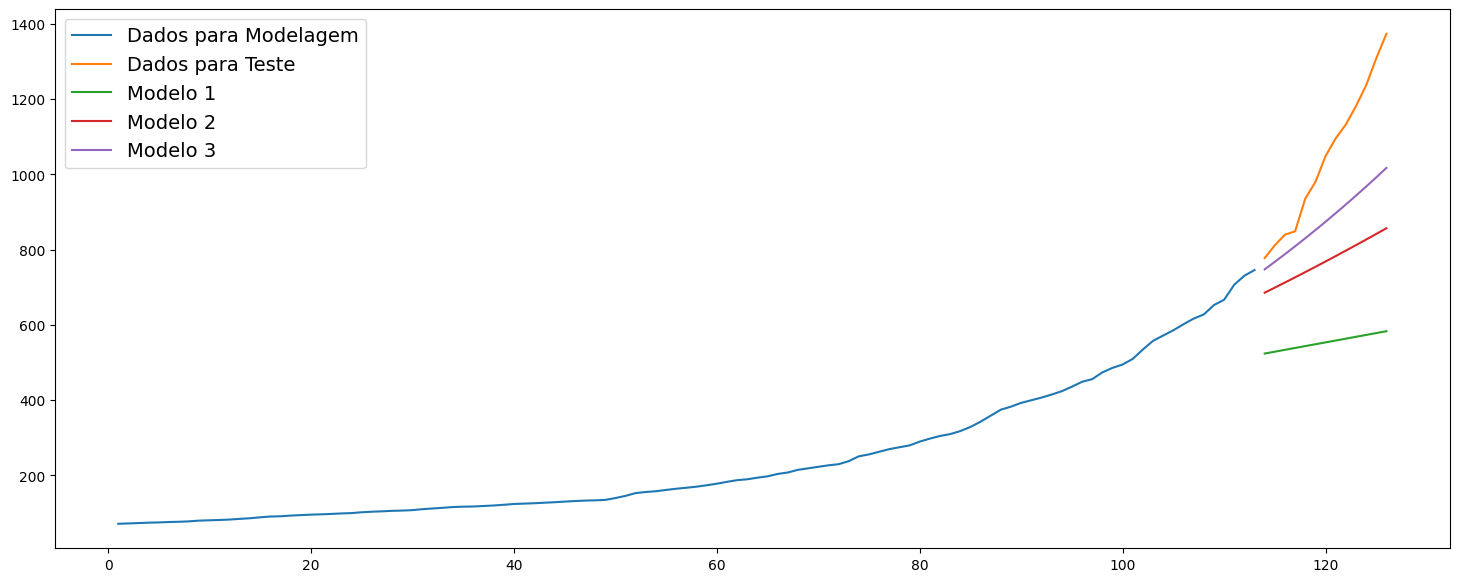

In [16]:
plt.figure(figsize = (18,7))

plt.plot(tModel,ZtModel, label = 'Dados para Modelagem')
plt.plot(tTest,ZtTest, label = 'Dados para Teste')
plt.plot(tTest,ZtTest1, label = 'Modelo 1')
plt.plot(tTest,ZtTest2, label = 'Modelo 2')
plt.plot(tTest,ZtTest3, label = 'Modelo 3')

plt.legend(loc = 'upper left', prop = {'size':14})
plt.show()

In [17]:
erro1 = abs(ZtTest1 - ZtTest)
erro2 = abs(ZtTest2 - ZtTest)
erro3 = abs(ZtTest3 - ZtTest)

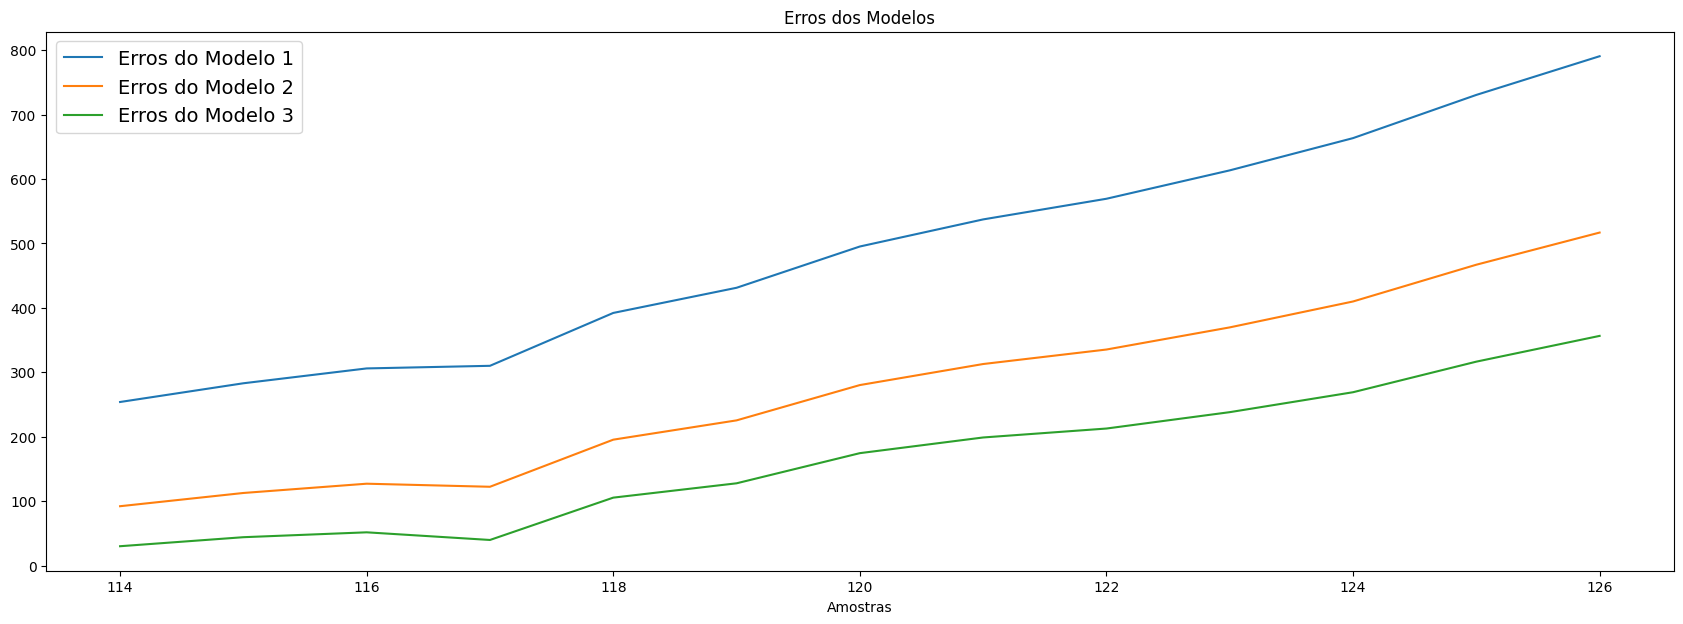

In [18]:
plt.figure(figsize = (21,7))

plt.plot(tTest,erro1, label = 'Erros do Modelo 1')
plt.plot(tTest,erro2, label = 'Erros do Modelo 2')
plt.plot(tTest,erro3, label = 'Erros do Modelo 3')

plt.legend(loc = 'upper left', prop = {'size':14})
plt.title('Erros dos Modelos')
plt.xlabel('Amostras')

plt.show()

In [19]:
erro1Med = np.mean(erro1)
erro2Med = np.mean(erro2)
erro3Med = np.mean(erro3)

print(f'Média de Erros do Modelo 1 : {erro1Med}')
print(f'Média de Erros do Modelo 2 : {erro2Med}')
print(f'Média de Erros do Modelo 3 : {erro3Med}')

Média de Erros do Modelo 1 : 490.48333094478863
Média de Erros do Modelo 2 : 274.4006216250293
Média de Erros do Modelo 3 : 166.56522480621626


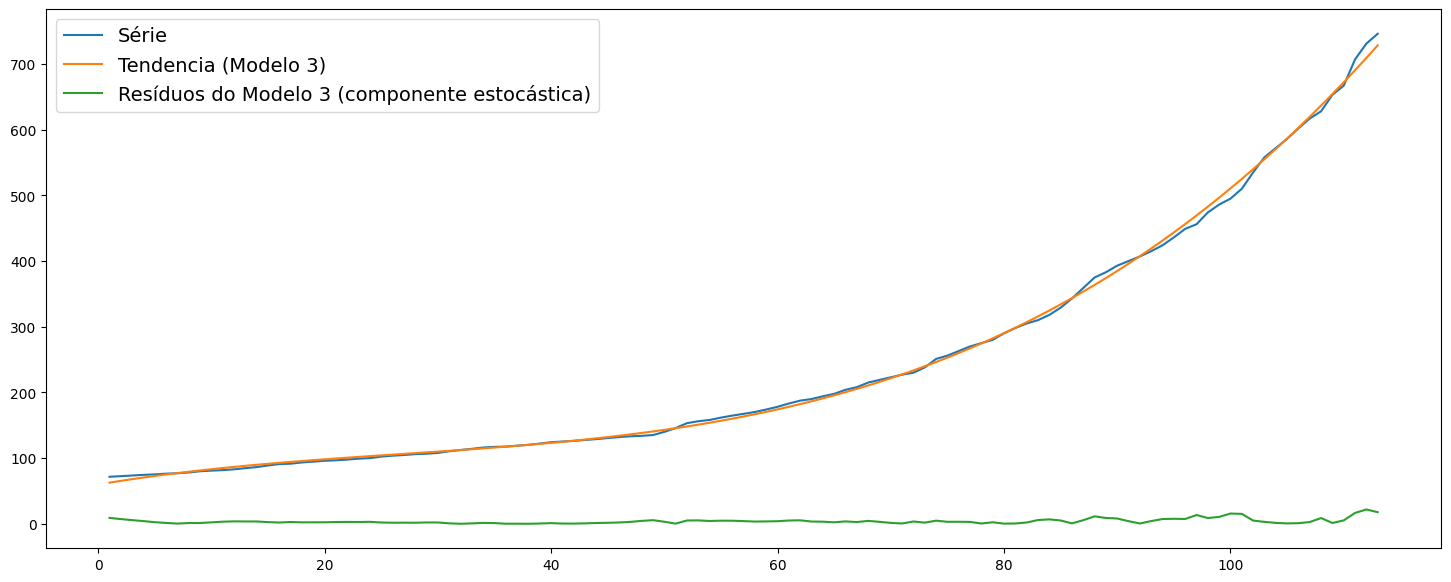

In [20]:
Yt = ZtModel - ZtModel3

plt.figure(figsize = (18,7))
plt.plot(tModel,ZtModel, label = 'Série')
plt.plot(tModel,ZtModel3, label = 'Tendencia (Modelo 3)')
plt.plot(tModel,res3, label = 'Resíduos do Modelo 3 (componente estocástica)')
plt.legend(loc = 'upper left', prop = {'size':14})
plt.show()